# DAY 2 [3.3%]

# Project - 02: Generate Parallel Databases | Lesson 3
Create a function, which can create a database and create other 5000, each with one person missing.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import torch
torch.manual_seed(0)

In [4]:
%matplotlib inline

In [11]:
def create_databases(p, num_entries, num_databases):
    """
    This function create a number of databases from db,
    where each new database has one missing row (element).
    
    params:
    ------
    
    p             -- Probability for the database.
    num_entries   -- Number of entries in the original db.
    num_databases -- Number of database to create.
    
    returns
    -------
    num_databases
    """
    assert num_entries == num_databases, 'Total entries {} different from total DB {}'.format(num_entries, num_databases)
    databases = []
    db = torch.rand(num_entries) > p
    for k in range(0, num_databases):
        databases.append(torch.cat([db[:k], db[k+1:]]))
    return db, databases

In [19]:
def plot_databases(data):
    """
    Plots the data density of two dbs.
    
    params:
    ---------
    data      -- A list contaning only two dbs
    
    returns:
    --------
    A plot.
    """
    fig, arr = plt.subplots(1, 2, figsize = (15, 5))
    arr[0].set_title('Data distribution with p=0.5')
    arr[1].set_title('Data distribution with p=0.7')
    sns.distplot(data[0], ax=arr[0])
    sns.distplot(data[1], ax=arr[1])
    fig.savefig('./plots/figure_2d.png', format = 'png', dpi = 250, bbox_inches = 'tight')

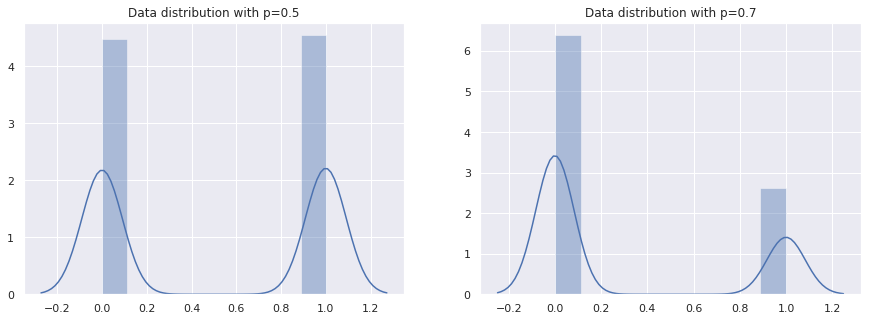

In [20]:
db1 = create_databases(p = 0.5, num_entries = 5000, num_databases = 5000)
db2 = create_databases(p = 0.7, num_entries = 5000, num_databases = 5000)
plot_databases([db1[0], db2[0]])

Final implementation

In [12]:
def create_db_and_parallels(p, num_entries):
    """
    Final function, which creates a db and parallels databases,
    using the function defined above.
    
    params:
    ------
    p            -- Data probability distribution.
    num_entries  -- Number of rows|samples.
    
    returns:
    -------
    db           -- Original database.
    databases    -- List of databases.
    """
    db, databases = create_databases(p, num_entries, num_entries)
    return db, databases

In [13]:
db, databases = create_db_and_parallels(0.5, 5000)

In [14]:
db

tensor([1, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)

In [15]:
# check databases
len(databases)

5000

In [16]:
# explore the first database
databases[1]

tensor([1, 0, 1,  ..., 0, 0, 0], dtype=torch.uint8)